# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Identifying temperture format
# temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# My generation
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

In [3]:
pprint(cities)

['macaboboni',
 'tuktoyaktuk',
 'mar del plata',
 'taoudenni',
 'tubuala',
 'mahebourg',
 'nikolskoye',
 'mataura',
 'busselton',
 'hilo',
 'izumo',
 'grand river south east',
 'uyuni',
 'ushuaia',
 'saskylakh',
 'neuquen',
 'flinders',
 'aksu',
 'alofi',
 'thompson',
 'albany',
 'amderma',
 'illoqqortoormiut',
 'fortuna',
 'port elizabeth',
 'jamestown',
 'rikitea',
 'east london',
 'vaini',
 'hobart',
 'rawannawi',
 'ahuimanu',
 'havoysund',
 'souillac',
 'zhigansk',
 'barrow',
 'severo-kurilsk',
 'butaritari',
 'katsuura',
 'antalaha',
 'strathmore',
 'meadow lake',
 'annau',
 'klaksvik',
 'kapaa',
 'santa vitoria',
 'warqla',
 'alice springs',
 'luderitz',
 'japura',
 'tura',
 'mayo',
 'gornoye loo',
 'bredasdorp',
 'cape town',
 'atuona',
 'saleaula',
 'port alfred',
 'bethel',
 'la libertad',
 'varva',
 'sao felix do xingu',
 'hambantota',
 'puerto ayora',
 'maxixe',
 'yar-sale',
 'tiksi',
 'belushya guba',
 'taolanaro',
 'sitka',
 'likasi',
 'aklavik',
 'grindavik',
 'narsaq',
 

In [4]:
# Define the url
# query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Converting to Farenheit
units = "&units=imperial"

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    query_url = url + city + units + "&appid=" + weather_api_key
    response = requests.get(query_url).json()
    
    pprint(response)
    
#     api.openweathermap.org/data/2.5/weather?id=524901&appid=YOUR_API_KEY
# Testing http://api.openweathermap.org/data/2.5/weather?id=524901&appid=5d9ded3545343896dc60a1122044a48e

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 69.4541, 'lon': -133.0374},
 'dt': 1612992276,
 'id': 6170031,
 'main': {'feels_like': -39.62,
          'humidity': 75,
          'pressure': 1050,
          'temp': -27.4,
          'temp_max': -27.4,
          'temp_min': -27.4},
 'name': 'Tuktoyaktuk',
 'sys': {'country': 'CA',
         'id': 942,
         'sunrise': 1612978970,
         'sunset': 1613003405,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 9.22}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -38.0023, 'lon': -57.5575},
 'dt': 1612992042,
 'id': 3430863,
 'main': {'feels_like': 64.72,
          'humidity': 78,
          'pressure': 1021,
          'temp': 68.18,
          'temp_max': 69.8,
    

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': -34.5833, 'lon': 150.8552},
 'dt': 1612992299,
 'id': 6255012,
 'main': {'feels_like': 68,
          'humidity': 88,
          'pressure': 1009,
          'temp': 64.83,
          'temp_max': 66,
          'temp_min': 64},
 'name': 'Flinders',
 'sys': {'country': 'AU',
         'id': 2033627,
         'sunrise': 1612985208,
         'sunset': 1613033699,
         'type': 3},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'gust': 3, 'speed': 1.01}}
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 41.1231, 'lon': 80.2644},
 'dt': 1612992300,
 'id': 1529660,
 'main': {'feels_like': 28.62,
          'grnd_level': 892,
          'humidity': 75,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 34.68,
          'temp_max': 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 21.4447, 'lon': -157.8378},
 'dt': 1612992301,
 'id': 5856516,
 'main': {'feels_like': 70.45,
          'humidity': 53,
          'pressure': 1018,
          'temp': 74.37,
          'temp_max': 75.2,
          'temp_min': 72},
 'name': '‘Āhuimanu',
 'sys': {'country': 'US',
         'id': 7877,
         'sunrise': 1612976681,
         'sunset': 1613017599,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 10.36}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 70.9963, 'lon': 24.6622},
 'dt': 1612992281,
 'id': 779622,
 'main': {'feels_like': 16.32,
          'humidity': 86,
          'pressure': 1020,
          'temp': 23.88,
          'temp_max': 24.8,
          'temp_min': 23},
 'name': 'Havøysund',
 'sno

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -18.8386, 'lon': -50.1214},
 'dt': 1612992304,
 'id': 3449749,
 'main': {'feels_like': 89.42,
          'grnd_level': 956,
          'humidity': 53,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 84.25,
          'temp_max': 84.25,
          'temp_min': 84.25},
 'name': 'Santa Vitória',
 'sys': {'country': 'BR', 'sunrise': 1612948278, 'sunset': 1612994298},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 199, 'speed': 0.4}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 38},
 'cod': 200,
 'coord': {'lat': -23.7, 'lon': 133.8833},
 'dt': 1612992304,
 'id': 2077895,
 'main': {'feels_like': 84.56,
          'humidity': 65,
          'pressure': 1007,
          'temp': 82.4,
          'temp_max': 82.4,
     

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 50.495, 'lon': 32.7197},
 'dt': 1612992306,
 'id': 690469,
 'main': {'feels_like': 1.45,
          'grnd_level': 995,
          'humidity': 96,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 10.11,
          'temp_max': 10.11,
          'temp_min': 10.11},
 'name': 'Varva',
 'sys': {'country': 'UA', 'sunrise': 1612933792, 'sunset': 1612969019},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 355, 'speed': 5.03}}
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': -6.6447, 'lon': -51.995},
 'dt': 1612992307,
 'id': 3388847,
 'main': {'feels_like': 90.45,
          'grnd_level': 985,
          'humidity': 94,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 79.29,
          'temp_max': 79.29,

{'base': 'stations',
 'clouds': {'all': 28},
 'cod': 200,
 'coord': {'lat': 60.1432, 'lon': -45.2371},
 'dt': 1612992292,
 'id': 3421765,
 'main': {'feels_like': 12.65,
          'grnd_level': 1012,
          'humidity': 89,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 24.17,
          'temp_max': 24.17,
          'temp_min': 24.17},
 'name': 'Nanortalik',
 'sys': {'country': 'GL', 'sunrise': 1612954356, 'sunset': 1612985875},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 54, 'speed': 11.83}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 16.9206, 'lon': 97.3714},
 'dt': 1612992308,
 'id': 1292288,
 'main': {'feels_like': 64.02,
          'grnd_level': 1007,
          'humidity': 52,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 66.45,
          'temp_

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': -21.05, 'lon': 31.6667},
 'dt': 1612992310,
 'id': 893485,
 'main': {'feels_like': 76.03,
          'grnd_level': 963,
          'humidity': 94,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 71.2,
          'temp_max': 71.2,
          'temp_min': 71.2},
 'name': 'Chiredzi',
 'rain': {'1h': 0.84},
 'sys': {'country': 'ZW', 'sunrise': 1612928484, 'sunset': 1612974832},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 127, 'speed': 4.43}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -53.15, 'lon': -70.9167},
 'dt': 1612992271,
 'id': 3874787,
 'main': {'feels_like': 60.19,
          'humidity': 55,
          'pressure': 1002,
          'temp': 66.09,
          'temp_max': 66.2,

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 26.1247, 'lon': 127.6694},
 'dt': 1612992311,
 'id': 1861280,
 'main': {'feels_like': 53.13,
          'humidity': 88,
          'pressure': 1015,
          'temp': 62.08,
          'temp_max': 62.6,
          'temp_min': 60.8},
 'name': 'Itoman',
 'rain': {'1h': 0.49},
 'sys': {'country': 'JP',
         'id': 8137,
         'sunrise': 1612994882,
         'sunset': 1613035154,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 60, 'gust': 32.21, 'speed': 20.71}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -28.65, 'lon': 153.6167},
 'dt': 1612992312,
 'id': 2172880,
 'main': {'feels_like': 66.76,
          'humidity': 94,
          'pressure': 1014,
          'temp': 65.79,
       

{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': 61.4732, 'lon': -6.8119},
 'dt': 1612992313,
 'id': 2610806,
 'main': {'feels_like': 26.06,
          'grnd_level': 1020,
          'humidity': 78,
          'pressure': 1028,
          'sea_level': 1028,
          'temp': 35.89,
          'temp_max': 35.89,
          'temp_min': 35.89},
 'name': 'Vágur',
 'sys': {'country': 'FO', 'sunrise': 1612945509, 'sunset': 1612976278},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 98, 'speed': 10.54}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.6391, 'lon': -120.4579},
 'dt': 1612992276,
 'id': 5367788,
 'main': {'feels_like': 52.45,
          'humidity': 59,
          'pressure': 1018,
          'temp': 60.49,
          'temp_max': 63,
          'temp_min': 55.99},
 'name': 'Lompoc',
 'sys': {'co

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 50.6114, 'lon': 105.3196},
 'dt': 1612992315,
 'id': 2017979,
 'main': {'feels_like': 3.2,
          'grnd_level': 931,
          'humidity': 90,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 11.57,
          'temp_max': 11.57,
          'temp_min': 11.57},
 'name': 'Petropavlovka',
 'sys': {'country': 'RU', 'sunrise': 1613002703, 'sunset': 1613038062},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 304, 'speed': 4.52}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 61.5814, 'lon': -149.4394},
 'dt': 1612992315,
 'id': 5877641,
 'main': {'feels_like': 7.27,
          'humidity': 79,
          'pressure': 1029,
          'temp': 13.96,
          'temp_max': 16,
          'temp_min': 10.4},
 'name': 'Wasilla',

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 52.7433, 'lon': 23.5812},
 'dt': 1612992317,
 'id': 771158,
 'main': {'feels_like': 9.88,
          'humidity': 86,
          'pressure': 1010,
          'temp': 17.01,
          'temp_max': 17.01,
          'temp_min': 17.01},
 'name': 'Hajnówka',
 'sys': {'country': 'PL',
         'id': 70275,
         'sunrise': 1612936340,
         'sunset': 1612970858,
         'type': 3},
 'timezone': 3600,
 'visibility': 1582,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 319, 'speed': 2.82}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 34.2257, 'lon': -77.9447},
 'dt': 1612992271,
 'id': 4499379,
 'main': {'feels_like': 46.69,
          'humidity': 62,
          'pressure': 1022,
          'temp': 53.87,
          'temp_max': 57.2,
          'temp_min': 52},
 'name': 'Wilmington',
 '

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -9.8756, 'lon': -56.0861},
 'dt': 1612992318,
 'id': 6316343,
 'main': {'feels_like': 93.43,
          'humidity': 66,
          'pressure': 1008,
          'temp': 86,
          'temp_max': 86,
          'temp_min': 86},
 'name': 'Alta Floresta',
 'sys': {'country': 'BR',
         'id': 8308,
         'sunrise': 1612950303,
         'sunset': 1612995135,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 3.44}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -34.7333, 'lon': 135.8667},
 'dt': 1612992293,
 'id': 2063036,
 'main': {'feels_like': 71.15,
          'grnd_level': 999,
          'humidity': 42,
          'pressure': 1001,
          'sea_level': 1001,
          'temp': 76.73,
          'temp_max'

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 48.9106, 'lon': 18.1669},
 'dt': 1612992320,
 'id': 3057141,
 'main': {'feels_like': 10.47,
          'humidity': 83,
          'pressure': 1008,
          'temp': 25,
          'temp_max': 28.99,
          'temp_min': 19.99},
 'name': 'Trenčianske Teplice',
 'sys': {'country': 'SK',
         'id': 2032546,
         'sunrise': 1612937050,
         'sunset': 1612972746,
         'type': 3},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 287, 'gust': 17, 'speed': 17}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 61.5996, 'lon': 5.0328},
 'dt': 1612992321,
 'id': 3156980,
 'main': {'feels_like': 11.66,
          'humidity': 68,
          'pressure': 1025,
          'temp': 23,
          'temp_max': 23,
          'temp_min': 23},
 'name': 'F

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 52.371, 'lon': 84.3873},
 'dt': 1612992322,
 'id': 1508517,
 'main': {'feels_like': -21.3,
          'grnd_level': 1014,
          'humidity': 89,
          'pressure': 1036,
          'sea_level': 1036,
          'temp': -10.43,
          'temp_max': -10.43,
          'temp_min': -10.43},
 'name': 'Bystryy Istok',
 'sys': {'country': 'RU', 'sunrise': 1613007991, 'sunset': 1613042821},
 'timezone': 25200,
 'visibility': 440,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 266, 'speed': 7.36}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -22.9661, 'lon': -42.0278},
 'dt': 1612992283,
 'id': 3471451,
 'main': {'feels_like': 80.55,
          'humidity': 78,
          'pressure': 1013,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Arraial do 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 23.1935, 'lon': 116.6142},
 'dt': 1612992324,
 'id': 1809062,
 'main': {'feels_like': 60.66,
          'humidity': 100,
          'pressure': 1013,
          'temp': 59,
          'temp_max': 59,
          'temp_min': 59},
 'name': 'Haimen',
 'sys': {'country': 'CN',
         'id': 9632,
         'sunrise': 1612997325,
         'sunset': 1613038018,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 50.6996, 'lon': -127.4199},
 'dt': 1612992324,
 'id': 6111862,
 'main': {'feels_like': 20.82,
          'humidity': 69,
          'pressure': 1022,
          'temp': 32,
          'temp_max': 32,
          'temp_min': 32},
 'name': 'Port Hardy',
 'sys': {'count

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -37.6167, 'lon': -73.65},
 'dt': 1612992274,
 'id': 3883457,
 'main': {'feels_like': 65.61,
          'grnd_level': 1006,
          'humidity': 67,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 68.47,
          'temp_max': 68.47,
          'temp_min': 68.47},
 'name': 'Lebu',
 'sys': {'country': 'CL', 'sunrise': 1612952368, 'sunset': 1613001501},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 216, 'speed': 9.06}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.0383, 'lon': 27.4292},
 'dt': 1612992094,
 'id': 320995,
 'main': {'feels_like': 51.67,
          'humidity': 93,
          'pressure': 1019,
          'temp': 54.48,
          'temp_max': 59,
          'temp_min': 50},
 'name': 'Bodrum',
 'sys': {'country': 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 8.0313, 'lon': -72.2605},
 'dt': 1612992328,
 'id': 3628060,
 'main': {'feels_like': 83.34,
          'humidity': 54,
          'pressure': 1011,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'Colon',
 'sys': {'country': 'VE',
         'id': 8587,
         'sunrise': 1612955285,
         'sunset': 1612997917,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 11.5}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 47.6666, 'lon': -52.7314},
 'dt': 1612992282,
 'id': 6167817,
 'main': {'feels_like': 9.12,
          'humidity': 80,
          'pressure': 995,
          'temp': 25.16,
          'temp_max': 26.01,
          'temp_min': 24.01},
 'name': 'Torbay',
 'sys':

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -37.8833, 'lon': 176.75},
 'dt': 1612992329,
 'id': 2187175,
 'main': {'feels_like': 72.63,
          'humidity': 97,
          'pressure': 1008,
          'temp': 67.66,
          'temp_max': 69.01,
          'temp_min': 66},
 'name': 'Matata',
 'sys': {'country': 'NZ',
         'id': 2008882,
         'sunrise': 1612978665,
         'sunset': 1613027812,
         'type': 3},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'gust': 3, 'speed': 1.99}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 52.7833, 'lon': 126.5333},
 'dt': 1612992329,
 'id': 2014038,
 'main': {'feels_like': -8.97,
          'grnd_level': 972,
          'humidity': 95,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 2.26,
          '

{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': 69.2167, 'lon': -51.1},
 'dt': 1612992286,
 'id': 3423146,
 'main': {'feels_like': -2.83,
          'humidity': 44,
          'pressure': 1013,
          'temp': 14,
          'temp_max': 14,
          'temp_min': 14},
 'name': 'Ilulissat',
 'sys': {'country': 'GL',
         'id': 165,
         'sunrise': 1612959229,
         'sunset': 1612983816,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 100, 'speed': 18.41}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -35.1, 'lon': 173.7833},
 'dt': 1612992279,
 'id': 2189343,
 'main': {'feels_like': 65.44,
          'humidity': 95,
          'pressure': 1007,
          'temp': 64,
          'temp_max': 64,
          'temp_min': 64},
 'name': 'Kaeo',
 'sys': {'country': 'NZ',
   

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 11.65, 'lon': 78.1667},
 'dt': 1612992334,
 'id': 1257629,
 'main': {'feels_like': 63.77,
          'grnd_level': 979,
          'humidity': 77,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 64.02,
          'temp_max': 64.02,
          'temp_min': 64.02},
 'name': 'Salem',
 'sys': {'country': 'IN', 'sunrise': 1613005798, 'sunset': 1613048000},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 65, 'speed': 4.16}}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -9.1667, 'lon': -60.6333},
 'dt': 1612992334,
 'id': 3665202,
 'main': {'feels_like': 91.83,
          'grnd_level': 989,
          'humidity': 87,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 81.3,
          'temp_max': 81.3,


{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 1.487, 'lon': 124.8455},
 'dt': 1612992256,
 'id': 1636544,
 'main': {'feels_like': 83.59,
          'humidity': 94,
          'pressure': 1009,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Manado',
 'sys': {'country': 'ID',
         'id': 9356,
         'sunrise': 1612993980,
         'sunset': 1613037412,
         'type': 1},
 'timezone': 28800,
 'visibility': 9000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 143, 'speed': 1.83}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 66.0449, 'lon': -17.3389},
 'dt': 1612992270,
 'id': 2629833,
 'main': {'feels_like': 10.81,
          'humidity': 86,
          'pressure': 1023,
          'temp': 17.6,
          'temp_max': 17.6,
          'temp_min': 17.6},
 'name': 'Husavik',
 'sys': {'coun

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 42.2529, 'lon': -71.0023},
 'dt': 1612992084,
 'id': 4948247,
 'main': {'feels_like': 16.09,
          'humidity': 46,
          'pressure': 1024,
          'temp': 29.55,
          'temp_max': 30.99,
          'temp_min': 28},
 'name': 'Quincy',
 'sys': {'country': 'US',
         'id': 3486,
         'sunrise': 1612957608,
         'sunset': 1612994990,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 13.8}}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 32.65, 'lon': -17.0667},
 'dt': 1612992339,
 'id': 2263905,
 'main': {'feels_like': 56.07,
          'humidity': 95,
          'pressure': 1020,
          'temp': 57.79,
          'temp_max': 60.01,
          'temp_min': 55},
 'name': 'Ribeira Brava',
 's

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 41.1415, 'lon': -73.3579},
 'dt': 1612992092,
 'id': 4845585,
 'main': {'feels_like': 21.88,
          'humidity': 51,
          'pressure': 1026,
          'temp': 31.78,
          'temp_max': 33.8,
          'temp_min': 30.99},
 'name': 'Westport',
 'sys': {'country': 'US',
         'id': 3409,
         'sunrise': 1612958054,
         'sunset': 1612995675,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'speed': 8.05}}
{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': 27.9769, 'lon': -114.0611},
 'dt': 1612992341,
 'id': 4021858,
 'main': {'feels_like': 50.58,
          'grnd_level': 1014,
          'humidity': 60,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 61.14,
          'temp_max': 61.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 20.8947, 'lon': -156.47},
 'dt': 1612992190,
 'id': 5847411,
 'main': {'feels_like': 65.12,
          'humidity': 50,
          'pressure': 1018,
          'temp': 73.15,
          'temp_max': 77,
          'temp_min': 71.01},
 'name': 'Kahului',
 'sys': {'country': 'US',
         'id': 7879,
         'sunrise': 1612976315,
         'sunset': 1613017308,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'gust': 25.32, 'speed': 16.11}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 67.8557, 'lon': 20.2251},
 'dt': 1612992292,
 'id': 605155,
 'main': {'feels_like': 9.64,
          'humidity': 93,
          'pressure': 1020,
          'temp': 17.6,
          'temp_max': 17.6,
          'temp_min': 17.6},
 'name': 'Kiruna',

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 0.5, 'lon': 29.4667},
 'dt': 1612992344,
 'id': 219057,
 'main': {'feels_like': 70.2,
          'grnd_level': 887,
          'humidity': 51,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 70.99,
          'temp_max': 70.99,
          'temp_min': 70.99},
 'name': 'Beni',
 'sys': {'country': 'CD', 'sunrise': 1612930411, 'sunset': 1612973961},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 217, 'speed': 2.51}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 30.0502, 'lon': -98.0336},
 'dt': 1612992344,
 'id': 4696788,
 'main': {'feels_like': 37.02,
          'humidity': 93,
          'pressure': 1017,
          'temp': 41.56,
          'temp_max': 43,
          'temp_mi

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 38.7296, 'lon': -120.7986},
 'dt': 1612992346,
 'id': 5383559,
 'main': {'feels_like': 53.78,
          'humidity': 58,
          'pressure': 1018,
          'temp': 59.54,
          'temp_max': 63,
          'temp_min': 55},
 'name': 'Placerville',
 'sys': {'country': 'US',
         'id': 5440,
         'sunrise': 1612969186,
         'sunset': 1613007315,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 8.05}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.3428, 'lon': 57.7575},
 'dt': 1612992289,
 'id': 1106677,
 'main': {'feels_like': 82.62,
          'humidity': 78,
          'pressure': 1013,
          'temp': 77.95,
          'temp_max': 78.8,
          'temp_min': 77},
 'name': 'Bambous Virieux',


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 14.9215, 'lon': -23.5087},
 'dt': 1612992347,
 'id': 3374333,
 'main': {'feels_like': 65.01,
          'humidity': 78,
          'pressure': 1015,
          'temp': 69.8,
          'temp_max': 69.8,
          'temp_min': 69.8},
 'name': 'Praia',
 'sys': {'country': 'CV',
         'id': 2462,
         'sunrise': 1612944019,
         'sunset': 1612985782,
         'type': 1},
 'timezone': -3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'speed': 16.11}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -33.2333, 'lon': -54.3833},
 'dt': 1612992347,
 'id': 3439781,
 'main': {'feels_like': 76.62,
          'grnd_level': 1008,
          'humidity': 71,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 76.89,
          'temp_max': 76.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 35.0375, 'lon': 33.9833},
 'dt': 1612992348,
 'id': 146209,
 'main': {'feels_like': 52.88,
          'humidity': 87,
          'pressure': 1020,
          'temp': 56.07,
          'temp_max': 57,
          'temp_min': 53.6},
 'name': 'Paralímni',
 'sys': {'country': 'CY',
         'id': 6372,
         'sunrise': 1612931720,
         'sunset': 1612970484,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 330, 'speed': 6.91}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 53.75, 'lon': 127.2667},
 'dt': 1612992310,
 'id': 2012593,
 'main': {'feels_like': -7.29,
          'grnd_level': 986,
          'humidity': 92,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 1.33,
          'temp_max': 1.33,
       

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.0095, 'lon': 48.4752},
 'dt': 1612992351,
 'id': 585187,
 'main': {'feels_like': 42.96,
          'humidity': 100,
          'pressure': 1016,
          'temp': 46.4,
          'temp_max': 46.4,
          'temp_min': 46.4},
 'name': 'Sabirabad',
 'sys': {'country': 'AZ',
         'id': 7510,
         'sunrise': 1613015050,
         'sunset': 1613053000,
         'type': 1},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 330, 'speed': 4.61}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 58.3807, 'lon': 12.3234},
 'dt': 1612992351,
 'id': 2665171,
 'main': {'feels_like': 5.18,
          'humidity': 86,
          'pressure': 1025,
          'temp': 20.19,
          'temp_max': 21.2,
          'temp_mi

{'base': 'stations',
 'clouds': {'all': 72},
 'cod': 200,
 'coord': {'lat': 39.8161, 'lon': 109.9776},
 'dt': 1612992352,
 'id': 1812256,
 'main': {'feels_like': 19.76,
          'grnd_level': 853,
          'humidity': 86,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 32.95,
          'temp_max': 32.95,
          'temp_min': 32.95},
 'name': 'Dongsheng',
 'sys': {'country': 'CN', 'sunrise': 1613000282, 'sunset': 1613038246},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 207, 'speed': 16.4}}
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -7.2833, 'lon': -76.8},
 'dt': 1612992352,
 'id': 3696267,
 'main': {'feels_like': 94.75,
          'grnd_level': 961,
          'humidity': 57,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 88.25,
          'temp_max': 88

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 43.3578, 'lon': 76.8594},
 'dt': 1612992353,
 'id': 1526384,
 'main': {'feels_like': 24.69,
          'humidity': 93,
          'pressure': 1021,
          'temp': 30.2,
          'temp_max': 30.2,
          'temp_min': 30.2},
 'name': 'Boralday',
 'rain': {'1h': 0.39},
 'sys': {'country': 'KZ',
         'id': 8818,
         'sunrise': 1613008597,
         'sunset': 1613045829,
         'type': 1},
 'timezone': 21600,
 'visibility': 2700,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 71, 'speed': 2.55}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': -8.103, 'lon': 156.8419},
 'dt': 1612992271,
 'id': 2108857,
 'main': {

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 33.9674, 'lon': 36.6574},
 'dt': 1612992356,
 'id': 162627,
 'main': {'feels_like': 34.34,
          'humidity': 71,
          'pressure': 1020,
          'temp': 45.03,
          'temp_max': 46.4,
          'temp_min': 43},
 'name': 'Yabrūd',
 'sys': {'country': 'SY',
         'id': 7605,
         'sunrise': 1612930985,
         'sunset': 1612969936,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 13.8}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 20.2613, 'lon': 100.4046},
 'dt': 1612992356,
 'id': 1611197,
 'main': {'feels_like': 53.55,
          'humidity': 100,
          'pressure': 1014,
          'temp': 53.6,
          'temp_max': 53.6,
          'temp_min': 53.6},
 'name': 'Chiang Khong',
 'sys': {'cou

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 66.9395, 'lon': -53.6735},
 'dt': 1612992357,
 'id': 3419842,
 'main': {'feels_like': 6.06,
          'grnd_level': 1013,
          'humidity': 87,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 14.63,
          'temp_max': 14.63,
          'temp_min': 14.63},
 'name': 'Sisimiut',
 'sys': {'country': 'GL', 'sunrise': 1612958674, 'sunset': 1612985606},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 26, 'speed': 5.12}}
{'base': 'stations',
 'clouds': {'all': 27},
 'cod': 200,
 'coord': {'lat': 4.375, 'lon': -7.7169},
 'dt': 1612992291,
 'id': 2276492,
 'main': {'feels_like': 85.06,
          'grnd_level': 1011,
          'humidity': 86,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 79.36,
          'temp_max': 79.36,
 

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 45.3667, 'lon': 27.5167},
 'dt': 1612992358,
 'id': 668198,
 'main': {'feels_like': 43.86,
          'grnd_level': 1006,
          'humidity': 75,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 50.31,
          'temp_max': 50.31,
          'temp_min': 50.31},
 'name': 'Salcia Tudor',
 'sys': {'country': 'RO', 'sunrise': 1612934345, 'sunset': 1612970964},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 182, 'speed': 8.48}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.2867, 'lon': 51.5333},
 'dt': 1612992358,
 'id': 290030,
 'main': {'feels_like': 64.9,
          'humidity': 94,
          'pressure': 1016,
          'temp': 63.07,
          'temp_max': 64.4,
          'temp_min': 62.01},
 'name': 'Doha',
 'sys

{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': 10.0667, 'lon': 34.5333},
 'dt': 1612992360,
 'id': 343292,
 'main': {'feels_like': 60.73,
          'grnd_level': 848,
          'humidity': 26,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 66.96,
          'temp_max': 66.96,
          'temp_min': 66.96},
 'name': 'Āsosa',
 'sys': {'country': 'ET', 'sunrise': 1613016171, 'sunset': 1613058572},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 37, 'speed': 4.43}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 38.5, 'lon': 48.6667},
 'dt': 1612992360,
 'id': 148442,
 'main': {'feels_like': 48.78,
          'humidity': 100,
          'pressure': 1016,
          'temp': 50,
          'temp_max': 50,
          'temp_min': 50},
 'name': 'Astara',
 'sys': {'country': '

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 64.75, 'lon': 177.4833},
 'dt': 1612992281,
 'id': 2127202,
 'main': {'feels_like': -22.67,
          'humidity': 76,
          'pressure': 1037,
          'temp': -14.8,
          'temp_max': -14.8,
          'temp_min': -14.8},
 'name': 'Anadyr',
 'sys': {'country': 'RU',
         'id': 8872,
         'sunrise': 1612988634,
         'sunset': 1613017492,
         'type': 1},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 38, 'speed': 1.77}}
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': -10.75, 'lon': -77.7667},
 'dt': 1612992361,
 'id': 3946820,
 'main': {'feels_like': 76.84,
          'grnd_level': 1006,
          'humidity': 61,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 77.14,
          'temp_max': 77.14,
  

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.8124, 'lon': 70.524},
 'dt': 1612992362,
 'id': 1162275,
 'main': {'feels_like': 52.11,
          'grnd_level': 1001,
          'humidity': 55,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 54.72,
          'temp_max': 54.72,
          'temp_min': 54.72},
 'name': 'Zahir Pir',
 'sys': {'country': 'PK', 'sunrise': 1613008791, 'sunset': 1613048675},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 252, 'speed': 0.31}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -8.5833, 'lon': 116.1167},
 'dt': 1612992362,
 'id': 1635882,
 'main': {'feels_like': 85.03,
          'humidity': 100,
          'pressure': 1008,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Mataram',
 'sys': {

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.6953, 'lon': 93.2761},
 'dt': 1612992363,
 'id': 1504075,
 'main': {'feels_like': -15.93,
          'grnd_level': 1013,
          'humidity': 88,
          'pressure': 1026,
          'sea_level': 1026,
          'temp': -6.12,
          'temp_max': -6.12,
          'temp_min': -6.12},
 'name': 'Kazachinskoye',
 'sys': {'country': 'RU', 'sunrise': 1613006848, 'sunset': 1613039698},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 237, 'speed': 5.68}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 59.1109, 'lon': 10.3933},
 'dt': 1612992363,
 'id': 3134521,
 'main': {'feels_like': 8.17,
          'humidity': 73,
          'pressure': 1027,
          'temp': 17.19,
          'temp_max': 19,
          'temp_min': 15.8},
 'name': 'Tjøme',


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.7806, 'lon': 7.6645},
 'dt': 1612992364,
 'id': 3181864,
 'main': {'feels_like': 42.57,
          'humidity': 87,
          'pressure': 1003,
          'temp': 48.34,
          'temp_max': 50,
          'temp_min': 46.99},
 'name': 'Bordighera',
 'sys': {'country': 'IT',
         'id': 6515,
         'sunrise': 1612938916,
         'sunset': 1612975921,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 310, 'speed': 8.05}}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -5.795, 'lon': -35.2094},
 'dt': 1612992281,
 'id': 3394023,
 'main': {'feels_like': 85.42,
          'humidity': 74,
          'pressure': 1009,
          'temp': 83.34,
  

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -32.25, 'lon': 148.6167},
 'dt': 1612992366,
 'id': 2168305,
 'main': {'feels_like': 58.33,
          'humidity': 82,
          'pressure': 1015,
          'temp': 62.6,
          'temp_max': 62.6,
          'temp_min': 62.6},
 'name': 'Dubbo',
 'sys': {'country': 'AU',
         'id': 9596,
         'sunrise': 1612985958,
         'sunset': 1613034024,
         'type': 1},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 80, 'speed': 11.5}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -5.6667, 'lon': 132.75},
 'dt': 1612992298,
 'id': 1623197,
 'main': {'feels_like': 86.7,
          'grnd_level': 1007,
          'humidity': 78,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 83.37,
          'temp_max': 83.37,
       

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.2083, 'lon': -115.9839},
 'dt': 1612992367,
 'id': 5509851,
 'main': {'feels_like': 51.6,
          'humidity': 29,
          'pressure': 1011,
          'temp': 59.22,
          'temp_max': 68,
          'temp_min': 42.01},
 'name': 'Pahrump',
 'sys': {'country': 'US',
         'id': 2002538,
         'sunrise': 1612967794,
         'sunset': 1613006396,
         'type': 3},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'gust': 8.99, 'speed': 5.99}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39.0911, 'lon': -94.4155},
 'dt': 1612992300,
 'id': 4391812,
 'main': {'feels_like': 0.54,
          'humidity': 73,
          'pressure': 1026,
          'temp': 13.64,
          'temp_max': 15.01,
          'temp_min': 12.2},
 'name': 'Inde

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -2.0833, 'lon': 101.3833},
 'dt': 1612992368,
 'id': 1625929,
 'main': {'feels_like': 65.52,
          'grnd_level': 895,
          'humidity': 82,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 64.06,
          'temp_max': 64.06,
          'temp_min': 64.06},
 'name': 'Sungai Penuh',
 'rain': {'1h': 0.205},
 'sys': {'country': 'ID', 'sunrise': 1612999396, 'sunset': 1613043258},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 18, 'speed': 2.21}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 49.2138, 'lon': -84.7705},
 'dt': 1612992369,
 'id': 5977046,
 'main': {'feels_like': -13.4,
          'grnd_level': 985,
          'humidity': 85,
          'pressure': 1029,
         

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# output is 635

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
# Set empty lists to hold data
lats = []
lngs = []
cloudiness = []
country = []
humidity = []
wind_speed = []
max_temps = []
city_value = []

for city in cities:

    # Create search query, make request and store in json
    # Set url for API
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    query_url = url + city + units + "&appid=" + weather_api_key
    response = requests.get(query_url).json()
    
    try:
        
        lngs.append(response['coord']['lon'])
        lats.append(response['coord']['lat'])
        city_value.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        max_temps.append(response['main']['temp_max'])
        print(f"Processing Record | {city} - found!")
    except:
        print("City not found. Skipping...")
    pass

Processing Record | qaanaaq - found!
Processing Record | vaini - found!
Processing Record | lisakovsk - found!
Processing Record | nueva loja - found!
Processing Record | carnarvon - found!
Processing Record | jinchang - found!
Processing Record | berbera - found!
City not found. Skipping...
Processing Record | cape town - found!
Processing Record | port alfred - found!
Processing Record | ribeira grande - found!
Processing Record | pangnirtung - found!
Processing Record | trairi - found!
Processing Record | ushuaia - found!
Processing Record | beringovskiy - found!
Processing Record | kedrovyy - found!
Processing Record | rikitea - found!
Processing Record | launceston - found!
Processing Record | jamestown - found!
Processing Record | punta arenas - found!
Processing Record | port keats - found!
Processing Record | komsomolskiy - found!
Processing Record | coquimbo - found!
Processing Record | paciran - found!
Processing Record | namatanai - found!
Processing Record | okhotsk - found

Processing Record | maningrida - found!
Processing Record | eyl - found!
Processing Record | ancud - found!
Processing Record | sao gabriel da cachoeira - found!
Processing Record | ulladulla - found!
Processing Record | husavik - found!
Processing Record | lebu - found!
Processing Record | chazuta - found!
City not found. Skipping...
Processing Record | shitanjing - found!
Processing Record | marienburg - found!
Processing Record | isangel - found!
Processing Record | nakamura - found!
Processing Record | kruisfontein - found!
Processing Record | tanete - found!
Processing Record | huangmei - found!
Processing Record | barbosa ferraz - found!
Processing Record | kristiinankaupunki - found!
Processing Record | vao - found!
Processing Record | saldanha - found!
Processing Record | broome - found!
City not found. Skipping...
Processing Record | jasper - found!
Processing Record | rock sound - found!
Processing Record | puerto ayora - found!
City not found. Skipping...
Processing Record |

Processing Record | doba - found!
Processing Record | louis trichardt - found!
Processing Record | mayumba - found!
Processing Record | russell - found!
Processing Record | bay city - found!
Processing Record | baft - found!
Processing Record | naantali - found!
Processing Record | portland - found!
Processing Record | dongsheng - found!
Processing Record | santa fe - found!
Processing Record | bahia blanca - found!
Processing Record | dryden - found!
Processing Record | vostok - found!
Processing Record | asau - found!
Processing Record | klaksvik - found!
Processing Record | khasan - found!
Processing Record | colac - found!
Processing Record | taksimo - found!
Processing Record | bulancak - found!
Processing Record | santiago del estero - found!
Processing Record | surt - found!
Processing Record | pachino - found!
Processing Record | santa cruz - found!
Processing Record | pingliang - found!
Processing Record | haimen - found!
Processing Record | sistranda - found!
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Converting raw data to DataFrame
weatherpy_dict = pd.DataFrame({
    'City': city_value,
    'Lat': lats,
    'Lng': lngs,
    'Max Temp': max_temps,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,

})


weatherpy_dict.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,qaanaaq,77.4840,-69.3632,4.59,73,100,11.63,GL
1,vaini,-21.2000,-175.2000,78.80,94,75,10.36,TO
2,lisakovsk,52.5369,62.4936,0.77,93,100,8.37,KZ
3,nueva loja,0.0847,-76.8828,89.60,58,40,3.44,EC
4,carnarvon,-24.8667,113.6333,69.80,88,0,19.57,AU


In [8]:
weatherpy_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,19.461753,15.631517,50.365036,70.814286,50.869643,7.860554
std,32.915892,91.811460,32.542162,20.384615,38.872975,5.537851
min,-54.800000,-179.166700,-27.400000,11.000000,0.000000,0.290000
25%,-6.692700,-68.533725,24.950000,59.000000,7.500000,3.732500
50%,23.390900,19.637400,64.130000,76.500000,45.500000,6.910000
75%,47.126875,99.040650,77.000000,87.000000,90.000000,10.870000
max,78.218600,179.316700,91.940000,100.000000,100.000000,34.470000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
top_humidity = weatherpy_dict.loc[weatherpy_dict["Humidity"]>100]
top_humidity

# There are no humidity greater than 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
weatherpy_dict

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,qaanaaq,77.4840,-69.3632,4.59,73,100,11.63,GL
1,vaini,-21.2000,-175.2000,78.80,94,75,10.36,TO
2,lisakovsk,52.5369,62.4936,0.77,93,100,8.37,KZ
3,nueva loja,0.0847,-76.8828,89.60,58,40,3.44,EC
4,carnarvon,-24.8667,113.6333,69.80,88,0,19.57,AU
...,...,...,...,...,...,...,...,...
555,revda,56.8010,59.9303,-22.00,76,20,2.24,RU
556,bud,39.4470,-86.1758,21.99,89,100,9.91,US
557,nobeoka,32.5833,131.6667,30.99,77,97,1.01,JP
558,huarmey,-10.0681,-78.1522,76.62,64,31,6.98,PE


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

quartiles = weatherpy_dict
lowerq = (weatherpy_dict['Humidity'].quantile(0.25))
upperq = (weatherpy_dict['Humidity'].quantile(0.75))
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Values below 17.0 could be outliers.
Values above 129.0 could be outliers.


In [14]:

city_data = weatherpy_dict.loc[(weatherpy_dict["Humidity"] >=30.5) & (weatherpy_dict["Humidity"] <122.5)]
clean_city_data = city_data.sort_values('Humidity', inplace = False)
clean_city_data.set_index('City')


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City,,,,,,,
siva,29.2041,25.5195,58.66,31,0,7.20,EG
surt,31.2089,16.5887,67.26,31,0,11.52,LY
ibra,22.6906,58.5334,64.80,32,94,4.12,OM
general pico,-35.6566,-63.7568,83.37,33,47,9.48,AR
ushuaia,-54.8000,-68.3000,75.20,33,0,19.57,AR
...,...,...,...,...,...,...,...
gat,31.6100,34.7642,60.01,100,0,4.85,IL
stephenville,32.2207,-98.2023,30.99,100,90,11.50,US
lac du bonnet,50.2536,-96.0612,-9.99,100,100,7.05,CA


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

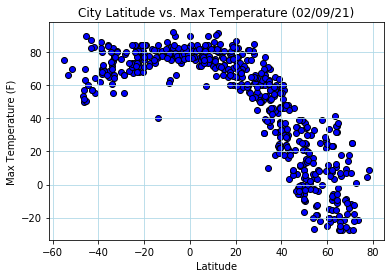

In [15]:
plt.scatter(weatherpy_dict["Lat"],weatherpy_dict["Max Temp"],edgecolors="black",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightblue")
plt.title("City Latitude vs. Max Temperature (02/09/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('../output_data/lat_vs_temperature_toussaint.png')
plt.show()

# My Analysis:

The results of the latitude vs. temperature shows a very non-linear form with an inverse relationship which indicates a higher latitude leads to decrease in temperature.

## Latitude vs. Humidity Plot

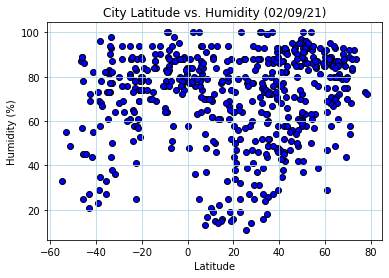

In [16]:
plt.scatter(weatherpy_dict["Lat"],weatherpy_dict["Humidity"],edgecolors="black",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightblue")
plt.title("City Latitude vs. Humidity (02/09/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('../output_data/lat_vs_humidity_toussaint.png')
plt.show()

# My Analysis:

The results of the latitude vs. humidity displays a weak relationship. The datapoints does not cover a wide enough range. However, there are pockets of where relationship are correlated around Latitude of 60 and Humidity of 80 and greater.

## Latitude vs. Cloudiness Plot

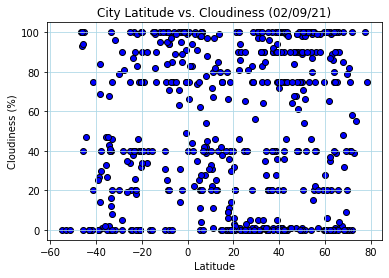

In [17]:
plt.scatter(weatherpy_dict["Lat"],weatherpy_dict["Cloudiness"],edgecolors="black",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightblue")
plt.title("City Latitude vs. Cloudiness (02/09/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('../output_data/lat_vs_cloudiness_toussaint.png')
plt.show()

# My Analysis:
    
The results of the latitude vs. cloudiness indicates a weak relationship.




## Latitude vs. Wind Speed Plot

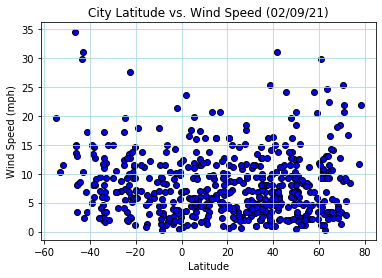

In [18]:
plt.scatter(weatherpy_dict["Lat"],weatherpy_dict["Wind Speed"],edgecolors="black",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightblue")
plt.title("City Latitude vs. Wind Speed (02/09/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('../output_data/lat_vs_windspeed_toussaint.png')
plt.show()

# My Analysis:

The results of the Latitude vs. Wind Speed displays moderate relationship. Which is skewed to the wind speed of less than 10.

## Linear Regression

In [19]:
# Create Northern and Southen divider

northern_hemisphere = weatherpy_dict.loc[weatherpy_dict["Lat"] >= 0]
southern_hemisphere = weatherpy_dict.loc[weatherpy_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7811314869973106


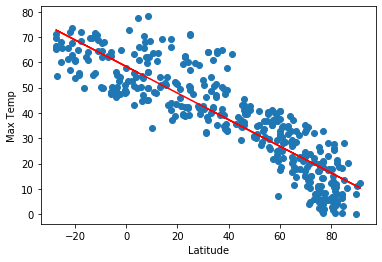

In [20]:
# Print out the r-squared value along with the plot.
x_values = northern_hemisphere["Max Temp"]
y_values = northern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating linear graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-squared is: {rvalue**2}")
plt.show()

# My Analysis:
    
The results of the Northern Hemisphere by Max Temp vs. Latitude displays a negative relationship but strong correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2073676266288405


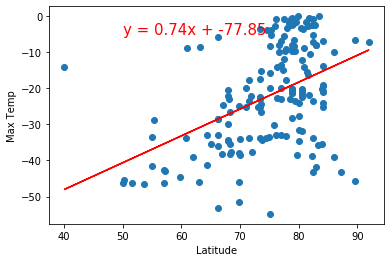

In [21]:
# Print out the r-squared value along with the plot.
x_values = southern_hemisphere["Max Temp"]
y_values = southern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,-5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# My Analysis:
    
The results of the Southern Hemisphere by Max Temp vs. Latitude shows a positive relationship by direction but weak correlction.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06463979447221659


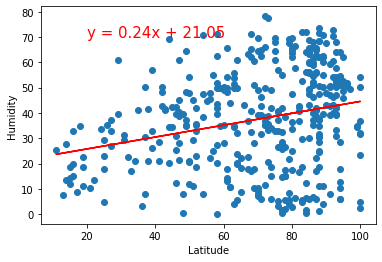

In [22]:
# Print out the r-squared value along with the plot.
x_values = northern_hemisphere["Humidity"]
y_values = northern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# My Analysis:
    
The results of the Northern Hemisphere by Humidity (%) vs. Latitude shows a positive relationship by direction but moderate to weak correlation. 


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18099079938837997


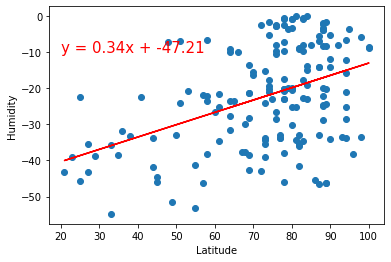

In [23]:
# Print out the r-squared value along with the plot.
x_values = southern_hemisphere["Humidity"]
y_values = southern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# My Analysis:
    
The results of the Southern Hemisphere by Humidity (%) vs. Latitude shows a positive relationship by direction but very weak correalation.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008061140350962821


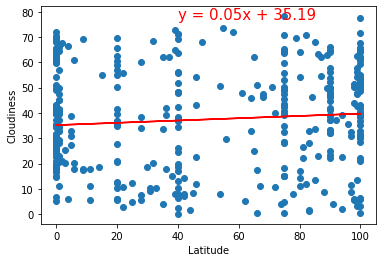

In [24]:
# Print out the r-squared value along with the plot.
x_values = northern_hemisphere["Cloudiness"]
y_values = northern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,77),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# My Analysis:
    
The results of the Northern Hemisphere by Cloudiness (%) vs. Latitude shows a positive relationship by direction but a moderate correlation. It looks to be outliers within the dataframe as well.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18309852837106574


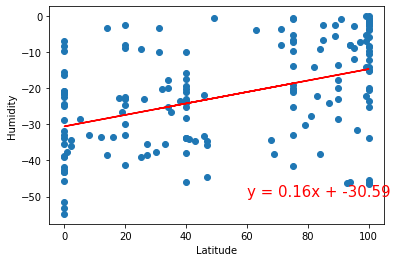

In [25]:
# Print out the r-squared value along with the plot.
x_values = southern_hemisphere["Cloudiness"]
y_values = southern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# My Analysis:
    
The results of the Southern Hemisphere by Cloudiness (%) vs. Latitude shows a positive relationship by direction but very weak correlation.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0015545470413693087


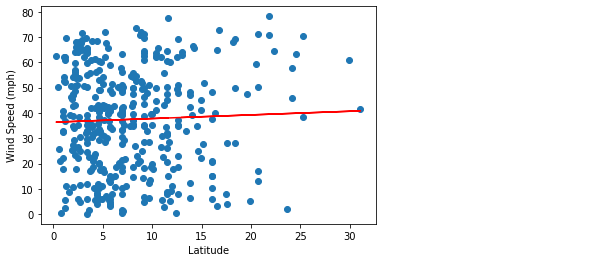

In [26]:
# Print out the r-squared value along with the plot.
x_values = northern_hemisphere["Wind Speed"]
y_values = northern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,77),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# My Analysis:
    
The results of the Northern Hemisphere by Wind Speed (mph) vs. Latitude shows a positive relationship by direction but skewed dataset with strong relationship with correlation around latitude of less than 10. 



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09386539794054168


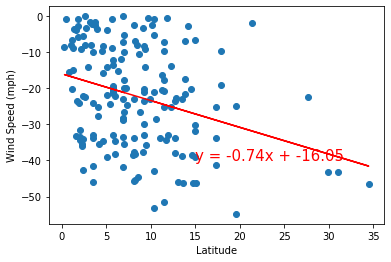

In [27]:
# Print out the r-squared value along with the plot.
x_values = southern_hemisphere["Wind Speed"]
y_values = southern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# My Analysis:

The results of the Southern Hemisphere by Wind Speed (mph) vs. Latitude shows a negative relationship by direction but very weak correlation.

